In [62]:
# Uncomment 3 rows below if you haven't installed these libraries.
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Load forecast (NOT REAL DATA)
#### Resource: [Elering - Electricity Consumption and Production](https://elering.ee/en/electricity-consumption-and-production#tab0)
#### Here, we manually transfer data from a .xls file to prepare it for a DataFrame.

In [64]:
months = ['January', 'February', 'March', 'April', 'May',
          'June', 'July', 'August', 'September', 'October',
          'November', 'December']

consumption_per_month = [864, 807, 824, 699, 663, 596, 603, 631, 646, 726, 781, 835]
maximum_load_per_hour = [1430, 1403, 1351, 1269, 1185, 1103, 1065, 1088, 1147, 1236, 1327, 1361]
minimum_load_per_hour = [784, 766, 757, 604, 587, 551, 547, 521, 588, 658, 739, 700]

#### Creating an empty DataFrame with necessary fields.

In [65]:
fields = ['month', 'consumption', 'maximum_load', 'minimum_load']

power_consumption_csv = pd.DataFrame(columns=fields)
power_consumption_csv

,month,consumption,maximum_load,minimum_load


#### Now that we have the DataFrame, we insert data into the corresponding fields.

In [66]:
power_consumption_csv['month'] = months
power_consumption_csv['consumption'] = consumption_per_month
power_consumption_csv['maximum_load'] = maximum_load_per_hour
power_consumption_csv['minimum_load'] = minimum_load_per_hour
power_consumption_csv

,month,consumption,maximum_load,minimum_load
0,January,864,1430,784
1,February,807,1403,766
2,March,824,1351,757
3,April,699,1269,604
4,May,663,1185,587
5,June,596,1103,551
6,July,603,1065,547
7,August,631,1088,521
8,September,646,1147,588
9,October,726,1236,658


#### The data now mirrors the information in the .xls file from the resource.

#### Now we will create a simple visualization to see what we've got.

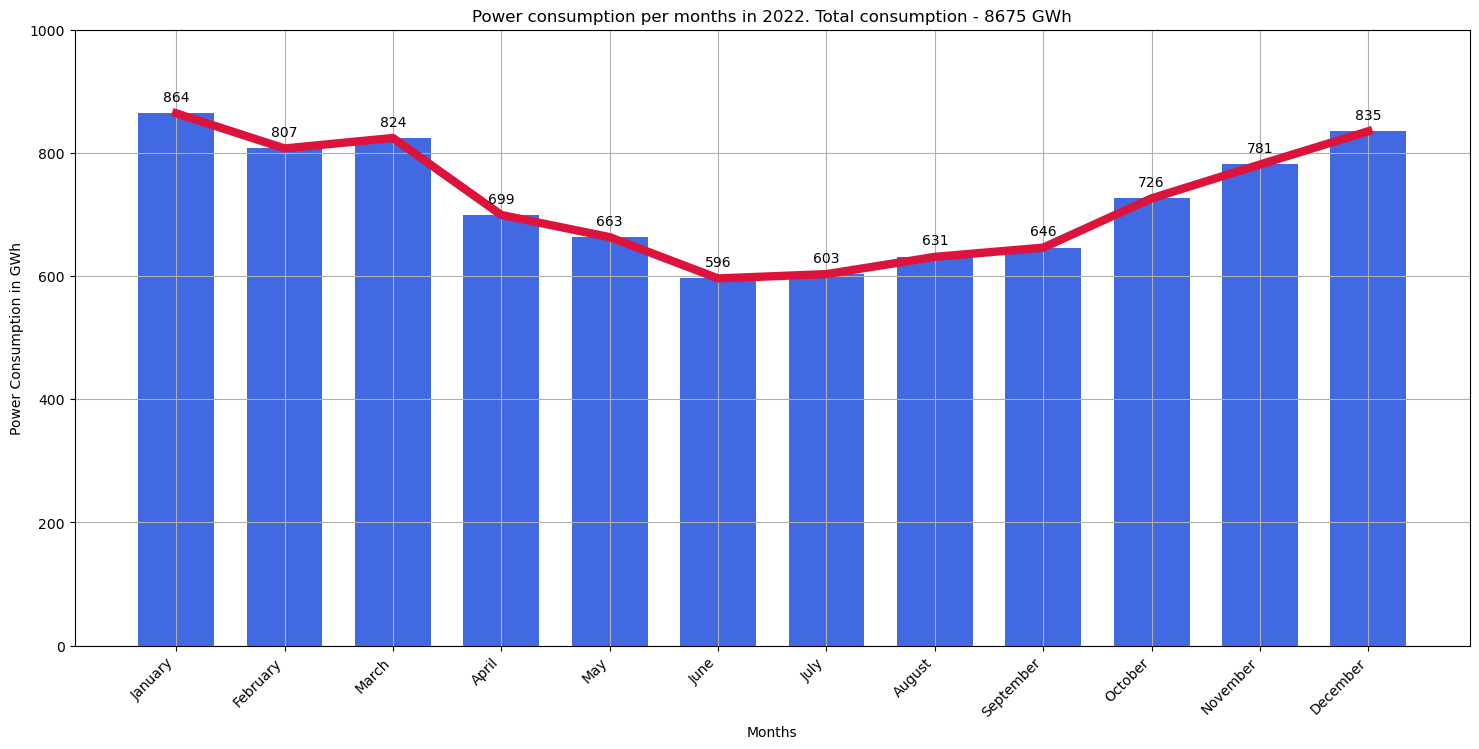

In [67]:
power_consumption_by_months = power_consumption_csv[['month', 'consumption']]

plt.figure(figsize=(18, 8))
plt.bar(power_consumption_by_months.month.values,
        power_consumption_by_months.consumption.values,
        color='royalblue', width=0.7)
plt.plot(power_consumption_by_months.consumption.values, color='crimson', linewidth=6, markersize=12)

plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.title(
    f'Power consumption per months in 2022. Total consumption - {np.sum(power_consumption_by_months.consumption.values)} GWh')
plt.xlabel('Months')
plt.ylim([0, 1000])
plt.ylabel('Power Consumption in GWh')
for i, consumption in enumerate(power_consumption_by_months.consumption.values):
    plt.text(i, consumption + 15, f'{consumption}', ha='center', va='bottom')

plt.show()
#plt.savefig('power_consumption.png')

#### Now we need some data about cities. 14 cities will be sufficient for display, the 15nth will be marked as 'Others' combining the rest of the cities.

#### The data is downloaded from [this resource](https://simplemaps.com/data/ee-cities).
#### This website simplified the process of finding data on the internet.

In [68]:
cities_frame = pd.read_csv('ee.csv')
cities_frame

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Tallinn,59.4372,24.7453,Estonia,EE,Tallinn,primary,438341.0,438341.0
1,Tartu,58.3833,26.7167,Estonia,EE,Tartu,admin,91407.0,91407.0
2,Narva,59.3758,28.1961,Estonia,EE,Narva,minor,53424.0,53424.0
3,Pärnu,58.3833,24.5000,Estonia,EE,Pärnu,admin,39605.0,39605.0
4,Kohtla-Järve,59.3978,27.2572,Estonia,EE,Kohtla-Järve,minor,33498.0,33498.0
...,...,...,...,...,...,...,...,...,...
88,Järvakandi,58.7789,24.8258,Estonia,EE,Kehtna,minor,NaN,NaN
89,Kanepi,57.9831,26.7564,Estonia,EE,Kanepi,minor,NaN,NaN
90,Kõrveküla,58.4242,26.7822,Estonia,EE,Tartu,minor,NaN,NaN
91,Värska,57.9581,27.6381,Estonia,EE,Setomaa,minor,NaN,NaN


#### However, we are only interested in city names and their populations.

In [69]:
cities_frame[['admin_name', 'population_proper']]

,admin_name,population_proper
0,Tallinn,438341.0
1,Tartu,91407.0
2,Narva,53424.0
3,Pärnu,39605.0
4,Kohtla-Järve,33498.0
...,...,...
88,Kehtna,NaN
89,Kanepi,NaN
90,Tartu,NaN
91,Setomaa,NaN


#### Now we need to calculate the percentage of each city's population compared to the total population of Estonia.

#### First we will find the sum of population of all cities

In [70]:
population_in_estonia = np.sum(cities_frame['population_proper'])
population_in_estonia

905150.0

#### The total population of Estonia, according to the given data, is 905 150. However, this number is higher.

#### We need to calculate the percentages.

In [71]:
cities_frame.describe()

,lat,lng,population,population_proper
count,93.000000,93.00000,68.000000,68.000000
mean,58.862928,25.60178,13349.205882,13311.029412
std,0.546174,1.23926,54092.497646,54098.319078
min,57.727800,22.48330,111.000000,111.000000
25%,58.372500,24.66750,1273.000000,1262.250000
50%,58.991700,25.46670,2254.500000,2154.500000
75%,59.361100,26.69970,5713.750000,5713.750000
max,59.553100,28.19610,438341.000000,438341.000000


In [72]:
percentage = pd.DataFrame(
    {'percentage': [((popul / population_in_estonia) * 100) for popul in cities_frame['population_proper']]})
percentage

,percentage
0,48.427443
1,10.098547
2,5.902226
3,4.375518
4,3.700823
...,...
88,NaN
89,NaN
90,NaN
91,NaN


#### We will now map the percentage of each city to the corresponding city.

#### Adding this list to the cities_frame DataFrame under the 'Percentage' field.

In [73]:
cities_frame = pd.concat([cities_frame, percentage], axis=1)
cities_frame

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper,percentage
0,Tallinn,59.4372,24.7453,Estonia,EE,Tallinn,primary,438341.0,438341.0,48.427443
1,Tartu,58.3833,26.7167,Estonia,EE,Tartu,admin,91407.0,91407.0,10.098547
2,Narva,59.3758,28.1961,Estonia,EE,Narva,minor,53424.0,53424.0,5.902226
3,Pärnu,58.3833,24.5000,Estonia,EE,Pärnu,admin,39605.0,39605.0,4.375518
4,Kohtla-Järve,59.3978,27.2572,Estonia,EE,Kohtla-Järve,minor,33498.0,33498.0,3.700823
...,...,...,...,...,...,...,...,...,...,...
88,Järvakandi,58.7789,24.8258,Estonia,EE,Kehtna,minor,NaN,NaN,NaN
89,Kanepi,57.9831,26.7564,Estonia,EE,Kanepi,minor,NaN,NaN,NaN
90,Kõrveküla,58.4242,26.7822,Estonia,EE,Tartu,minor,NaN,NaN,NaN
91,Värska,57.9581,27.6381,Estonia,EE,Setomaa,minor,NaN,NaN,NaN


#### We noticed that some of the data is missing in the population fields, so we need to ensure that the total percentage is 100%.

In [74]:
# population_proper has NaN values
cities_frame.isna().sum()

city                  0
lat                   0
lng                   0
country               0
iso2                  0
admin_name            0
capital              20
population           25
population_proper    25
percentage           25
dtype: int64

In [75]:
total_percentage = np.sum(cities_frame['percentage'])
total_percentage

100.0

#### There is nothing to worry about; the percentages sum up to 100%.

#### Now that we have this data, we need to iterate over and map cities with their corresponding population values and percentages.

#### We only need 15 values: 14 from the top cities, and the 15th representing the sum of the others.

In [76]:
cities_and_population = list(zip(range(1, 15),
                                 cities_frame['admin_name'],
                                 cities_frame['population_proper'],
                                 cities_frame['percentage']))

cities_and_population

[(1, 'Tallinn', 438341.0, 48.42744296525438),
 (2, 'Tartu', 91407.0, 10.098547202121196),
 (3, 'Narva', 53424.0, 5.902226150361819),
 (4, 'Pärnu', 39605.0, 4.375517869966304),
 (5, 'Kohtla-Järve', 33498.0, 3.700823067999779),
 (6, 'Viljandi', 16875.0, 1.864331878694139),
 (7, 'Maardu', 15284.0, 1.688559907197702),
 (8, 'Rakvere', 14984.0, 1.6554162293542507),
 (9, 'Saaremaa', 12933.0, 1.4288239518311883),
 (10, 'Sillamäe', 12230.0, 1.3511572667513672),
 (11, 'Valga', 12040.0, 1.330166270783848),
 (12, 'Võru', 11533.0, 1.274153455228415),
 (13, 'Jõhvi', 10541.0, 1.164558360492736),
 (14, 'Keila', 10078.0, 1.113406617687676)]

#### We also need to calculate the population and percentage for 'Others'.

In [77]:
# Iterating over cities_frame['population_proper'] to get the sum of 'Others' population.
# If the value is 'nan' the ValueError will be handled by except block telling it to skip this iteration.

others_population = 0
for index, row in cities_frame.iterrows():
    if index <= 13:
        continue
    try:
        proper_population = int(row['population_proper'])
        others_population += proper_population
    except ValueError:
        continue

others_population_percentage = (others_population / population_in_estonia) * 100

others_population, others_population_percentage

(132377, 14.624868806275204)

In [78]:
# Appending 'Others' data to the list.

cities_and_population.append((15, 'Others', others_population, others_population_percentage))
cities_and_population

[(1, 'Tallinn', 438341.0, 48.42744296525438),
 (2, 'Tartu', 91407.0, 10.098547202121196),
 (3, 'Narva', 53424.0, 5.902226150361819),
 (4, 'Pärnu', 39605.0, 4.375517869966304),
 (5, 'Kohtla-Järve', 33498.0, 3.700823067999779),
 (6, 'Viljandi', 16875.0, 1.864331878694139),
 (7, 'Maardu', 15284.0, 1.688559907197702),
 (8, 'Rakvere', 14984.0, 1.6554162293542507),
 (9, 'Saaremaa', 12933.0, 1.4288239518311883),
 (10, 'Sillamäe', 12230.0, 1.3511572667513672),
 (11, 'Valga', 12040.0, 1.330166270783848),
 (12, 'Võru', 11533.0, 1.274153455228415),
 (13, 'Jõhvi', 10541.0, 1.164558360492736),
 (14, 'Keila', 10078.0, 1.113406617687676),
 (15, 'Others', 132377, 14.624868806275204)]

#### We need to ensure that it matches the population_in_estonia variable and the total percentage is 100%

In [79]:
check_population = check_percentage = 0
for index, name, popul, percent in cities_and_population:
    check_population += popul
    check_percentage += percent

print('The population check matches:', check_population == population_in_estonia)
print('The percentage check matches:', check_percentage == 100)

The population check matches: True
The percentage check matches: True


#### Now we can evenly distribute the power consumption per month among the cities, and then per day to draw a visualization.

In [80]:
days_in_months_in_2022 = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

#### Creating a DataFrame with one column containing months and inserting data.

#### Before inserting data for a city, we will multiply total consumption for a specific month by the city's percentage. By doing this, we will evenly distribute the power over cities, rounding the values to 2 decimal points.


In [81]:
# Creating DataFrame with one column containing months
df = pd.DataFrame({'Month': months})
df['Consumption'] = consumption_per_month

# Inserting Total Consumption and Consumption per cities to the DataFrame
for index, name, popul, percent in cities_and_population:
    df[name] = [round(cons * (percent / 100), 2) for cons in consumption_per_month]

#df.to_csv('power_consumption_in_2022_over_cities.csv')
df

,Month,Consumption,Tallinn,Tartu,Narva,Pärnu,Kohtla-Järve,Viljandi,Maardu,Rakvere,Saaremaa,Sillamäe,Valga,Võru,Jõhvi,Keila,Others
0,January,864,418.41,87.25,51.00,37.80,31.98,16.11,14.59,14.30,12.35,11.67,11.49,11.01,10.06,9.62,126.36
1,February,807,390.81,81.50,47.63,35.31,29.87,15.05,13.63,13.36,11.53,10.90,10.73,10.28,9.40,8.99,118.02
2,March,824,399.04,83.21,48.63,36.05,30.49,15.36,13.91,13.64,11.77,11.13,10.96,10.50,9.60,9.17,120.51
3,April,699,338.51,70.59,41.26,30.58,25.87,13.03,11.80,11.57,9.99,9.44,9.30,8.91,8.14,7.78,102.23
4,May,663,321.07,66.95,39.13,29.01,24.54,12.36,11.20,10.98,9.47,8.96,8.82,8.45,7.72,7.38,96.96
5,June,596,288.63,60.19,35.18,26.08,22.06,11.11,10.06,9.87,8.52,8.05,7.93,7.59,6.94,6.64,87.16
6,July,603,292.02,60.89,35.59,26.38,22.32,11.24,10.18,9.98,8.62,8.15,8.02,7.68,7.02,6.71,88.19
7,August,631,305.58,63.72,37.24,27.61,23.35,11.76,10.65,10.45,9.02,8.53,8.39,8.04,7.35,7.03,92.28
8,September,646,312.84,65.24,38.13,28.27,23.91,12.04,10.91,10.69,9.23,8.73,8.59,8.23,7.52,7.19,94.48
9,October,726,351.58,73.32,42.85,31.77,26.87,13.54,12.26,12.02,10.37,9.81,9.66,9.25,8.45,8.08,106.18


#### To allow the user to see some data for a specific day, we need a new CSV file containing 365 days.

In [82]:
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
dataf = pd.DataFrame({'Date': dates})

dataf

,Date
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
360,2022-12-27
361,2022-12-28
362,2022-12-29
363,2022-12-30


#### Since this data is not provided, it will be randomly divided among 28-30-31 days, ensuring the sum of each month matches the consumption_per_month values.

#### We will use a uniform distribution to reduce huge deviations for a random number.
#### Thus, it will not allow a huge deviation, for example, on the 2nd day consumption was 30 GWh and on the next day it was 4 GWh. It is not close to reality.

In [89]:
np.random.seed(153)

# Percentage offset
random_factors = np.random.uniform(0.05, 0.1, size=30)

array_normalized = random_factors / np.sum(random_factors) * 864  # Where 864 is the consumption for January 

array_normalized

array([22.84780781, 30.4422025 , 29.73519278, 21.01098561, 29.78720881,
       35.98323796, 24.30047593, 29.77432424, 30.27224818, 25.49980797,
       35.13349691, 32.51431725, 35.33788442, 28.03877343, 33.37886616,
       30.94904666, 23.67771156, 23.1492213 , 31.42922366, 23.40706721,
       38.1296193 , 20.55717305, 31.52956074, 34.92139729, 30.72617219,
       29.50923285, 21.38984567, 29.7014209 , 24.43481772, 26.43165995])

#### Distributing all values among 365 days.

#### Creating empty one-dim array to be concatenated with normalized one-dim array.

In [84]:
np.random.seed(153)

temp = np.array([], dtype=float)

for month_index in range(12):
    # The keyword 'size' parameter depends on the number of days in a specific month
    random_factors = np.random.uniform(0.05, 0.1, size=days_in_months_in_2022[month_index])

    array_normalized = random_factors / np.sum(random_factors) * consumption_per_month[month_index]
    temp = np.concatenate((temp, array_normalized), axis=0)

temp

array([21.97017686, 29.27285534, 28.59300331, 20.20391075, 28.6430213 ,
       34.60104832, 23.36704504, 28.63063165, 29.10942932, 24.52030828,
       33.78394755, 31.26537593, 33.98048413, 26.96174689, 32.09671576,
       29.76023059, 22.76820231, 22.26001244, 30.221963  , 22.50795396,
       36.66498277, 19.76753006, 30.31844593, 33.57999511, 29.54591717,
       28.37572296, 20.56821802, 28.56052868, 23.49622648, 25.41636592,
       33.18800416, 36.295799  , 22.54762274, 22.46879654, 35.64143961,
       27.64027465, 30.4445096 , 21.12831265, 20.17651776, 27.94346066,
       19.81982669, 32.71279116, 34.5833545 , 20.12222795, 19.7879959 ,
       27.40512253, 34.54595597, 27.96386353, 31.12215761, 25.69509903,
       27.99161018, 29.54848182, 35.45101394, 31.21415079, 34.86220734,
       23.57384109, 34.7208003 , 35.25060687, 36.34215956, 32.08014898,
       32.81002788, 20.19015208, 28.4555388 , 25.5216539 , 21.07441611,
       28.74000327, 17.90547012, 25.75180199, 22.77397192, 34.85

#### Now the power consumption is randomly split among 365 days.

#### Inserting all the data into a new DataFrame.

In [85]:
dataf['Consumption'] = [i for i in temp]

for index, name, popul, percent in cities_and_population:
    dataf[name] = [round(cons * (percent / 100), 2) for cons in temp]

#dataf.to_csv('daily_power_consumption_in_2022_estonia.csv')
dataf

,Date,Consumption,Tallinn,Tartu,Narva,Pärnu,Kohtla-Järve,Viljandi,Maardu,Rakvere,Saaremaa,Sillamäe,Valga,Võru,Jõhvi,Keila,Others
0,2022-01-01,21.970177,10.64,2.22,1.30,0.96,0.81,0.41,0.37,0.36,0.31,0.30,0.29,0.28,0.26,0.24,3.21
1,2022-01-02,29.272855,14.18,2.96,1.73,1.28,1.08,0.55,0.49,0.48,0.42,0.40,0.39,0.37,0.34,0.33,4.28
2,2022-01-03,28.593003,13.85,2.89,1.69,1.25,1.06,0.53,0.48,0.47,0.41,0.39,0.38,0.36,0.33,0.32,4.18
3,2022-01-04,20.203911,9.78,2.04,1.19,0.88,0.75,0.38,0.34,0.33,0.29,0.27,0.27,0.26,0.24,0.22,2.95
4,2022-01-05,28.643021,13.87,2.89,1.69,1.25,1.06,0.53,0.48,0.47,0.41,0.39,0.38,0.36,0.33,0.32,4.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,25.837278,12.51,2.61,1.52,1.13,0.96,0.48,0.44,0.43,0.37,0.35,0.34,0.33,0.30,0.29,3.78
361,2022-12-28,22.405927,10.85,2.26,1.32,0.98,0.83,0.42,0.38,0.37,0.32,0.30,0.30,0.29,0.26,0.25,3.28
362,2022-12-29,35.838361,17.36,3.62,2.12,1.57,1.33,0.67,0.61,0.59,0.51,0.48,0.48,0.46,0.42,0.40,5.24
363,2022-12-30,30.399851,14.72,3.07,1.79,1.33,1.13,0.57,0.51,0.50,0.43,0.41,0.40,0.39,0.35,0.34,4.45


#### Now it is possible to test the DataFrame and build some visualizations to see what it looks like.

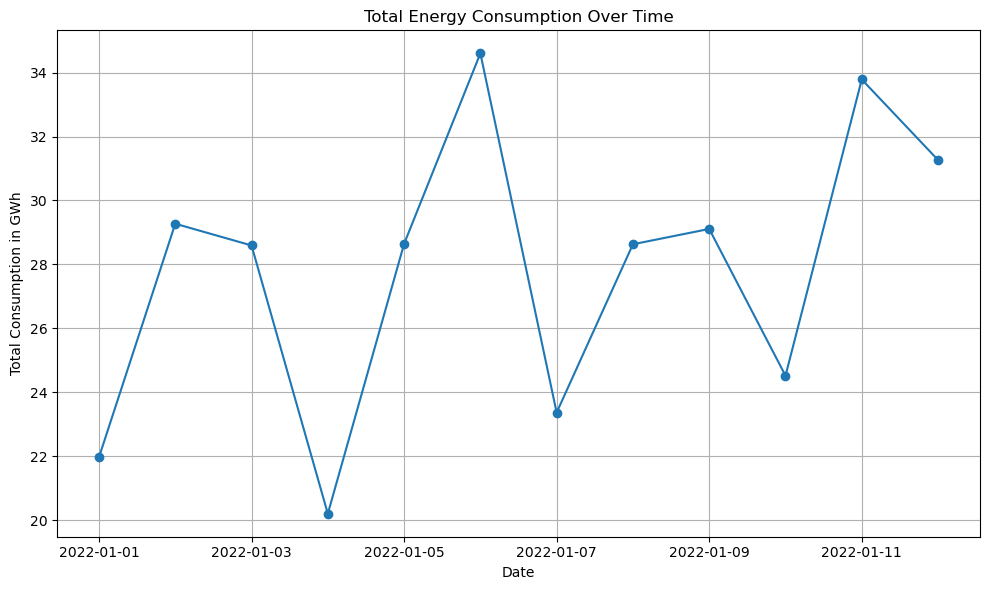

In [86]:
# Plotting consumption for only 12 days
plt.figure(figsize=(10, 6))
plt.plot(dataf.Date[:12], dataf.Consumption[:12], marker='o', linestyle='-')
plt.title('Total Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Total Consumption in GWh')
plt.grid(True)
plt.xticks()
plt.tight_layout()
plt.show()

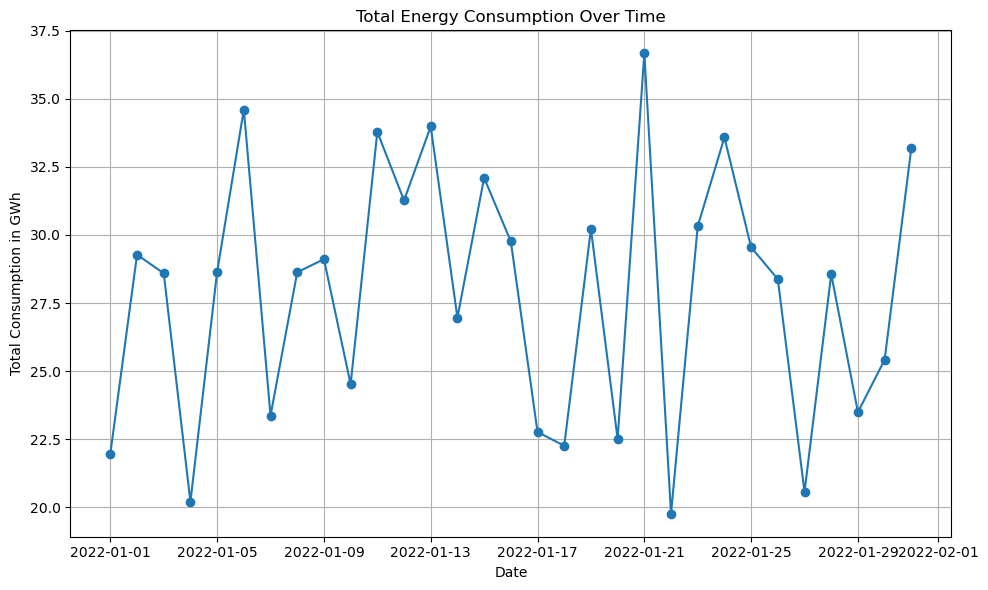

In [87]:
# Plotting consumption for January
plt.figure(figsize=(10, 6))
plt.plot(dataf.Date[:31], dataf.Consumption[:31], marker='o', linestyle='-')
plt.title('Total Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Total Consumption in GWh')
plt.grid(True)
plt.xticks()
plt.tight_layout()
plt.show()

#### Power Consumption Visualization for a specific typed date, for example '2022-04-15' (YYYY-MM-DD).

#### Note that the year can only be 2022!

#### In the function below GWh notation has been changed to MWh!

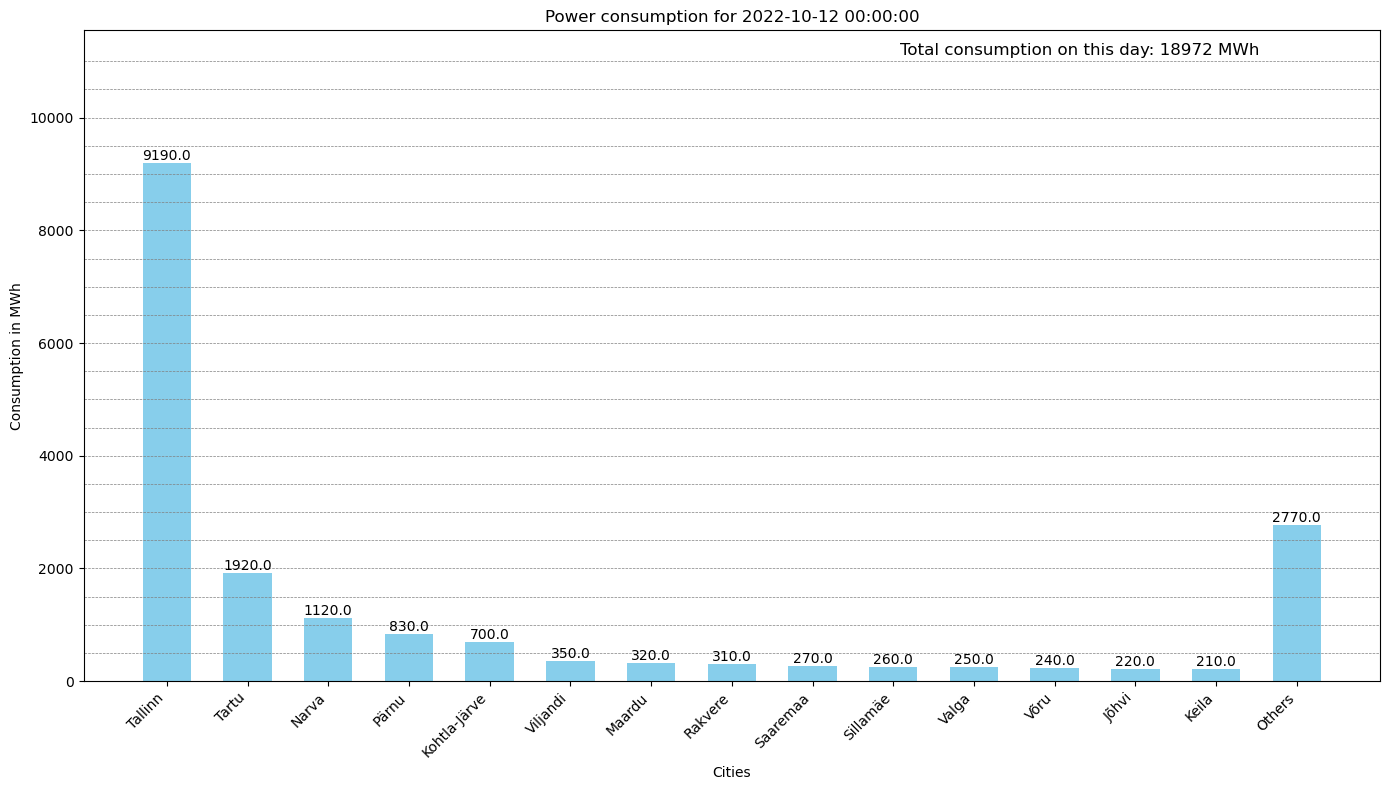

In [88]:
from matplotlib.ticker import AutoLocator


def draw_bars_using_date(date: str) -> None:
    """
    Parameters
    ----------
    date : str
        Date in the format 'YYYY-MM-DD' for which the power consumption bar chart for each city is required.
    Returns
    -------
    None
    """
    # Data manipulation
    global dataf
    data_for_date = dataf.loc[dataf['Date'] == date]
    datestamp = data_for_date['Date'].iloc[0]  # Get the date from DataFrame
    cities = dataf.columns[2:]  # Get the city names
    total_consumption = data_for_date['Consumption'].iloc[0]
    consumptions_per_city = data_for_date[cities].values.flatten()  # Get energy consumption for each city
    consumptions_per_city_mwh = [value * 1000 for value in consumptions_per_city]
    maximum_cons = max(consumptions_per_city_mwh)

    plt.figure(figsize=(14, 8))
    plt.bar(cities, consumptions_per_city_mwh, color='skyblue', width=0.6)  # Use a color palette for the bars

    plt.locator_params(axis='y', nbins=20)
    # Finding the maximum value in the consumption per cities values, adding 2000 to it so that the max value will not touch the chart.
    # Setting horizontal lines for every 500 marks.
    horizontal_lines = np.arange(0, maximum_cons + 2000, 500)
    for line in horizontal_lines:
        plt.axhline(line, color='gray', linestyle='--', linewidth=0.5)  # Add horizontal grid lines

    # Total consumption text label
    plt.text(0.63, 0.98, f'Total consumption on this day: {round(total_consumption * 1000)} MWh',
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Labels
    plt.ylabel('Consumption in MWh')
    plt.title(f'Power consumption for {datestamp}')
    plt.xlabel('Cities')
    plt.xticks(rotation=45, ha='right')

    # adjusting y-axis ticks
    plt.gca().yaxis.set_major_locator(AutoLocator())

    # display data labels for each bar for better value reading
    for i, consumption in enumerate(consumptions_per_city_mwh):
        plt.text(i, consumption + 0.1, f'{consumption}', ha='center', va='bottom')  # Adjust vertical position

    plt.tight_layout()
    plt.show()

# As an example, we will visualize this data for '2022-10-12'
draw_bars_using_date('2022-10-12')
